In [1]:
import csv
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import scipy as sp
import seaborn as sns

In [2]:
# Importing traffic data...
traffic = pd.read_csv('dft_traffic_counts_aadf.csv')

# Calculating the number of rows and showing the first 5 entries...
print(len(traffic.index), 'rows')
traffic.head()

461945 rows


,count_point_id,year,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,51,2019,1,South West,1,Isles of Scilly,A3111,Major,"Pierhead, Hugh Town",A3112,...,25,449,43,0,0,0,0,0,43,1164
1,52,2019,1,South West,1,Isles of Scilly,A3112,Major,A3111,A3110,...,7,231,5,0,0,0,0,0,5,709
2,53,2019,1,South West,1,Isles of Scilly,A3111,Major,A3112,A3110,...,7,427,21,0,0,1,0,0,21,1342
3,54,2019,1,South West,1,Isles of Scilly,A3110,Major,A3111,A3112,...,6,298,37,0,0,0,0,0,37,745
4,55,2019,1,South West,1,Isles of Scilly,A3110,Major,A3111,A3112,...,0,179,16,0,0,0,0,0,16,384


# Task 1

## Data processing

In [3]:
# Chnaging road names to their first letter (A, B, C, U or M)...
traffic['road_name'] = traffic['road_name'].astype(str).str[0]

# Removing unnecessary columns...
cols_to_drop = 'region_id local_authority_id local_authority_name start_junction_road_name \
end_junction_road_name easting northing latitude longitude link_length_km estimation_method_detailed \
hgvs_2_rigid_axle hgvs_3_rigid_axle hgvs_4_or_more_rigid_axle hgvs_3_or_4_articulated_axle \
hgvs_5_articulated_axle hgvs_6_articulated_axle'.split()

traffic.drop(cols_to_drop, axis=1, inplace=True)
traffic.head()

,count_point_id,year,region_name,road_name,road_type,link_length_miles,estimation_method,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
0,51,2019,South West,A,Major,0.19,Estimated,267,100,546,25,449,43,1164
1,52,2019,South West,A,Major,1.24,Counted,245,26,439,7,231,5,709
2,53,2019,South West,A,Major,0.75,Estimated,202,92,796,7,427,21,1342
3,54,2019,South West,A,Major,0.19,Estimated,69,57,347,6,298,37,745
4,55,2019,South West,A,Major,2.49,Estimated,38,21,168,0,179,16,384


## Filling in minor road missing lengths
Using the 'Road Lengths in Great Britain 2019' document. This gives the total length of all minor roads per region, from which the link lengths can be approximated by dividing by the number of link lengths per region.    
    
https://www.gov.uk/government/statistical-data-sets/road-length-statistics-rdl   
Under 'RDL0101: Road length (miles) by road type and region and country in Great Britain'

In [4]:
# Finding all NaN values for minor roads...
traffic.loc[(traffic['link_length_miles'].isna()) & (traffic['road_type']=='Minor')]

,count_point_id,year,region_name,road_name,road_type,link_length_miles,estimation_method,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
1560,802362,2019,South West,U,Minor,NaN,Counted,4,3,200,0,55,8,266
1561,806060,2019,South West,C,Minor,NaN,Counted,9,5,1662,23,212,14,1916
1562,806271,2019,South West,U,Minor,NaN,Counted,1,1,297,3,44,4,349
1563,806314,2019,South West,B,Minor,NaN,Counted,0,2,663,3,186,52,904
1564,806319,2019,South West,C,Minor,NaN,Counted,66,29,3059,16,492,40,3636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461940,997007,2000,North East,U,Minor,NaN,Counted,43,35,3581,313,237,53,4219
461941,997015,2000,North East,B,Minor,NaN,Counted,42,169,1863,19,224,17,2292
461942,997038,2000,North East,U,Minor,NaN,Counted,19,1,708,0,64,5,778
461943,997060,2000,North East,U,Minor,NaN,Counted,21,17,312,0,15,3,347


All minor road link lengths are NaN.

In [5]:
# Checking that the sum of all major road link lengths in my DataFrame equals the 
# total length of major roads as given in the above document (31,800 miles)...

print(traffic.loc[(traffic['year']==2019) & (traffic['road_type']=='Major')]['link_length_miles'].sum())

# It does. This gives me more confidence that the document and my data are talking about the same thing.

31803.82


In [6]:
# Creating a list of total minor roads lengths per region per year; taken from the data linked above...

rdl_doc = xlrd.open_workbook("rdl0101.xlsx")
minor_total_lengths_all_years = []
region_names = ['North East', 'North West', 'Yorkshire and The Humber', \
                       'East Midlands', 'West Midlands', 'East of England', \
                       'London', 'South East', 'South West', \
                       'Wales', 'Scotland']
excel_col_locs = [False,True,False,False,True,False,False,True,True,True,True,True,True,True,True]
col = 15
for sheet_num in range(1, rdl_doc.nsheets):
    # Reading excel sheet...
    sheet = rdl_doc.sheet_by_index(sheet_num)
    minor_total_lengths = []
    # Extracting regional road length totals...
    for i, row in enumerate(list(np.arange(9, 18))+[19,20]):
        include_U = excel_col_locs[sheet_num-1]
        region_b1 = sheet.cell_value(rowx=row, colx=col)
        region_c1 = sheet.cell_value(rowx=row, colx=col+1)
        if include_U == False:
            region_b2 = sheet.cell_value(rowx=row, colx=col+3)
            region_c2 = sheet.cell_value(rowx=row, colx=col+4)
        else:
            region_b2 = sheet.cell_value(rowx=row, colx=col+4)
            region_c2 = sheet.cell_value(rowx=row, colx=col+5)
            region_u1 = sheet.cell_value(rowx=row, colx=col+2)
            region_u2 = sheet.cell_value(rowx=row, colx=col+6)
            region_c1 += region_u1
            region_c2 += region_u2
        minor_total_lengths.append((region_names[i], [region_b1 + region_b2, region_c1 + region_c2]))
    minor_total_lengths_all_years.append(minor_total_lengths)

# Copying the data from 2005 to use with earlier years (the document only goes down to 2005)...
minor_total_lengths_all_years += 5*[minor_total_lengths_all_years[-1]]

In [7]:
minor_total_lengths_all_years

[[('North East', [836.6, 8197.2]),
  ('North West', [1255.7, 18963.3]),
  ('Yorkshire and The Humber', [1187.8, 16315.400000000001]),
  ('East Midlands', [1238.1, 15950.7]),
  ('West Midlands', [1562.4, 16601.2]),
  ('East of England', [2064.8, 20191.1]),
  ('London', [314.5, 7766.6]),
  ('South East', [1908.6999999999998, 24449.699999999997]),
  ('South West', [2043.2, 25946.3]),
  ('Wales', [1872.0, 16434.5]),
  ('Scotland', [4558.1, 25588.0])],
 [('North East', [836.5, 8174.8]),
  ('North West', [1252.4, 18927.0]),
  ('Yorkshire and The Humber', [1188.5, 16309.2]),
  ('East Midlands', [1245.4, 15892.8]),
  ('West Midlands', [1562.2, 16559.9]),
  ('East of England', [2056.7999999999997, 20174.7]),
  ('London', [314.09999999999997, 7763.8]),
  ('South East', [1911.6999999999998, 24367.4]),
  ('South West', [2042.7, 25915.800000000003]),
  ('Wales', [1869.9, 16435.7]),
  ('Scotland', [4556.2, 25585.800000000003])],
 [('North East', [834.4000000000001, 8171.799999999999]),
  ('North Wes

In [8]:
# Fidning the number of minor road links and the average link length per region in 2019...
print('============================================================================================')
print('Calculating the number of minor road links and hence average link length per region per year')
print('============================================================================================\n')

for i, minor_total_lengths in enumerate(minor_total_lengths_all_years):
    # Iterating through the years...
    year = 2019 - i
    for region, [B_length, CU_length] in minor_total_lengths:
        # Calculating the nuber of link lengths...
        num_links_CU = len(traffic.loc[(traffic['road_type']=='Minor') & (traffic['region_name']==region) & \
                                    (traffic['year']==year) & ((traffic['road_name']=='C') | \
                                     (traffic['road_name']=='U'))].index)

        # Calculating the average link length...
        average_length_CU = CU_length / num_links_CU

        # Updating the traffic DataFrame using the road length data...
        traffic.loc[(traffic['road_type']=='Minor') & (traffic['region_name']==region) \
                    & (traffic['year']==year) & ((traffic['road_name']=='C') | \
                    (traffic['road_name']=='U')), 'link_length_miles'] = average_length_CU

        # Calculating the nuber of link lengths...
        num_links_B = len(traffic.loc[(traffic['road_type']=='Minor') & (traffic['region_name']==region) & \
                                    (traffic['year']==year) & (traffic['road_name']=='B')].index)

        # Calculating the average link length...
        average_length_B = B_length / num_links_B

        # Updating the traffic DataFrame using the road length data...
        traffic.loc[(traffic['road_type']=='Minor') & (traffic['region_name']==region) \
                    & (traffic['year']==year) & (traffic['road_name']=='B'), \
                    'link_length_miles'] = average_length_B
    
    print('...year {} updated'.format(year))
        # Calculating the average link length...
        #average_length = length / num_links
        #if i == 0:
        #    print('{}: \n~~~~~~~~~~~~~~~~~~~~~~~~~\n{} links \nAverage link length = {:.2f} miles\n'.format( \
        #                            region, num_links, average_length))

        # Updating the traffic DataFrame using the road length data...
        #traffic.loc[(traffic['road_type']=='Minor') & (traffic['region_name']==region) \
        #            & (traffic['year']==year), 'link_length_miles'] = average_length

Calculating the number of minor road links and hence average link length per region per year

...year 2019 updated
...year 2018 updated
...year 2017 updated
...year 2016 updated
...year 2015 updated
...year 2014 updated
...year 2013 updated
...year 2012 updated
...year 2011 updated
...year 2010 updated
...year 2009 updated
...year 2008 updated
...year 2007 updated
...year 2006 updated
...year 2005 updated
...year 2004 updated
...year 2003 updated
...year 2002 updated
...year 2001 updated
...year 2000 updated


In [9]:
# Checking it has worked...
print(traffic.loc[(traffic['road_type']=='Minor') & (traffic['year']==2019)]['link_length_miles'].sum())
traffic.loc[(traffic['road_type']=='Minor') & (traffic['year']==2005) \
           & (traffic['road_name']=='C')]
# It has, the link lengths have been updated to their estimated average values.

215245.9


,count_point_id,year,region_name,road_name,road_type,link_length_miles,estimation_method,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
337195,919472,2005,South West,C,Minor,73.470349,Counted,131,259,18230,153,1658,203,20503
337196,919476,2005,South West,C,Minor,73.470349,Counted,25,83,2729,12,475,20,3319
337234,930438,2005,South West,C,Minor,73.470349,Counted,47,97,8831,46,1024,61,10059
337236,930440,2005,South West,C,Minor,73.470349,Counted,302,135,10055,18,848,50,11106
337239,930443,2005,South West,C,Minor,73.470349,Counted,11,33,2557,96,319,35,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357769,996822,2005,North East,C,Minor,45.821512,Counted,0,0,217,0,45,6,268
357771,996865,2005,North East,C,Minor,45.821512,Counted,1,3,1270,6,174,55,1508
357773,996970,2005,North East,C,Minor,45.821512,Counted,13,9,1280,37,126,6,1458
357774,996988,2005,North East,C,Minor,45.821512,Counted,5,36,4173,106,584,58,4957


## Annual mileage per region for each vehicle type

In [10]:
# Calculating mileages...
mileage = traffic[['pedal_cycles', \
                           'two_wheeled_motor_vehicles', 'cars_and_taxis', \
                           'buses_and_coaches', 'lgvs', 'all_hgvs', 'all_motor_vehicles']].multiply( \
                            traffic['link_length_miles'], axis=0) * 365

# Adding back the year and region columns...
mileage[['year', 'region_name', 'road_name']] = traffic[['year', 'region_name', 'road_name']]


# The data for motorways in the North East is missing...
# Here I use the difference between A roads in the North West 
# and North East and the data on motorways in the North West to approximate it...

regional_mileage = mileage.groupby(['road_name','region_name','year']).sum()

M_north_west = regional_mileage.loc['M','North West'].multiply(( \
                                regional_mileage.loc['A', 'North East']['all_motor_vehicles'] / \
                                regional_mileage.loc['A', 'North West']['all_motor_vehicles']).values, axis=0)
M_north_west['year'], M_north_west['region_name'], M_north_west['road_name'] = M_north_west.index, 'North East', 'M'

# Adding the new estimated data to the dataframe...
mileage = mileage.append(M_north_west, ignore_index=True)

# Annual mileage by road type...
annual_mileage_road_type = mileage.groupby(['road_name', 'region_name', 'year']).sum() / 1e9

# C and unclassified roads...
annual_mileage_CU = annual_mileage_road_type.loc[['C','U']].groupby(['region_name', 'year']).sum()

### Accounting for the government's benchmark adjustments...
(Due to the different minor road samples across years). Using data and information from here:       

https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/916749/road-traffic-estimates-in-great-britain-2019.pdf   
   
and here:
   
https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/916033/2019-minor-road-benchmarking-methodology-report.pdf

In [11]:
# Benchmark adjustment for minor roads (B, C and U)...
benchmark_adj_CU = list([80.9,81.6,84.9,85.1,85.2,85.4,86.5,88.5,87.2,85.6, \
                 85.6,86.6,87.8,89.2,93.8,96.1,99,102.1,103.3,105.8] / \
                annual_mileage_CU.groupby(['year']).sum()['all_motor_vehicles']) * 11
benchmark_adj_B = list([22.3,21.9,22.2,22.2,22.4,22.6,22.5,23.4,23.1,22.5,22.7, \
                 22.9,23.1,23.6,25.1,26,26.7,27.9,28.7,30] / \
                annual_mileage_road_type.loc['B'].groupby(['year']).sum()['all_motor_vehicles']) * 11

# Updating annual mileage with benchmark adjustments by road type...
annual_mileage_road_type.loc['B'] = annual_mileage_road_type.loc['B'].multiply(benchmark_adj_B, axis=0).values
annual_mileage_road_type.loc['C'] = annual_mileage_road_type.loc['C'].multiply(benchmark_adj_CU, axis=0).values
annual_mileage_road_type.loc['U'] = annual_mileage_road_type.loc['U'].multiply(benchmark_adj_CU, axis=0).values

# Combining C and U roads...
#annual_mileage_CU = annual_mileage_road_type.loc[['C','U']].groupby(['region_name', 'year']).sum()

# Total annual mileage...
annual_mileage = annual_mileage_road_type.groupby(['region_name', 'year']).sum()

In [12]:
# Benchmark adjustment for specific vehicle types...
benchmark_adj_cycles = list([2.6,2.6,2.7,2.8,2.6,2.7,2.8,2.6,2.8,3,3,3.1,3.1, \
                 3.1,3.5,3.2,3.2,3.3,3.3,3.5] / \
                annual_mileage.groupby(['year']).sum()['pedal_cycles']) * 5 * 11
benchmark_adj_buses = list([3.2,3.2,3.2,3.3,3.2,3.2,3.3,3.4,3.1,3.1, \
                 3.2,3,2.8,2.9,2.9,2.8,2.6,2.6,2.5,2.4] / \
                annual_mileage.groupby(['year']).sum()['buses_and_coaches']) * 5 * 11

# Updating annual mileage with benchmark adjustments by vehicle type...
annual_mileage_road_type['buses_and_coaches'] = annual_mileage_road_type['buses_and_coaches'].multiply( \
                                                benchmark_adj_buses, axis=0).values
annual_mileage_road_type['pedal_cycles'] = annual_mileage_road_type['pedal_cycles'].multiply( \
                                                benchmark_adj_cycles, axis=0).values

# Total annual mileage by region...
annual_mileage_regional = annual_mileage_road_type.groupby(['region_name', 'year']).sum()

# Total annual mileage...
annual_mileage = annual_mileage_road_type.groupby(['year']).sum()

# Total annual mileage by road type...
annual_mileage_road_type = annual_mileage_road_type.groupby(['road_name', 'year']).sum()

# Combining C and U roads...
annual_mileage_CU = annual_mileage_road_type.loc[['C','U']].groupby(['year']).sum()

### Overall annual mileage (national)

C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


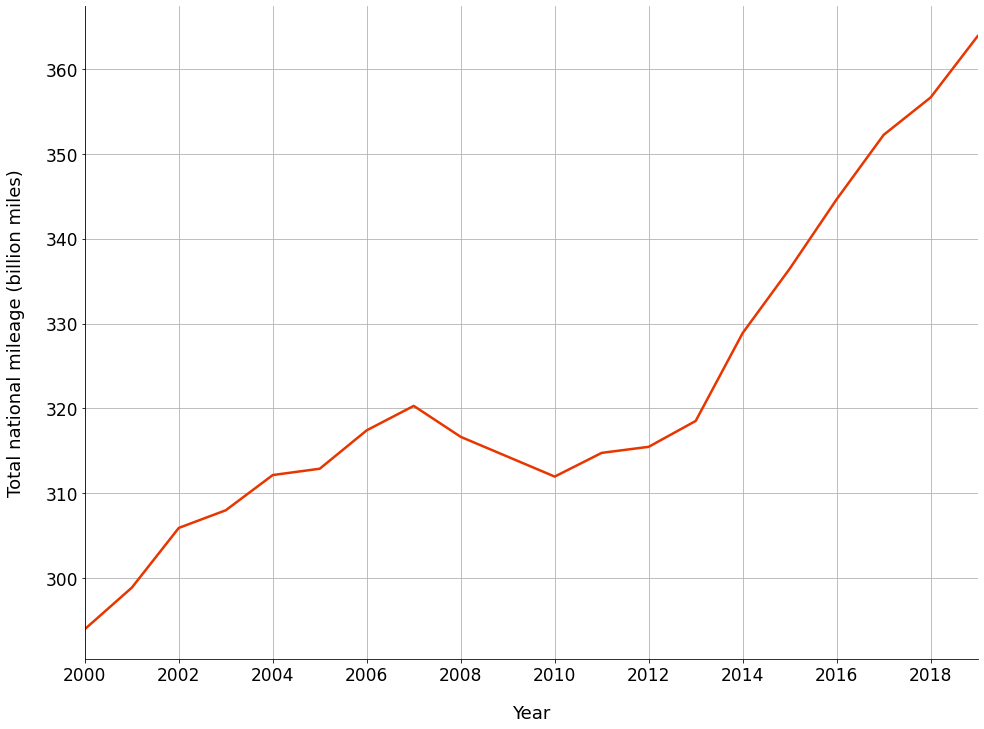

In [13]:
# Plotting all road types on one graph...
fig = plt.figure(figsize=(16,12))
sns.lineplot(annual_mileage.index, annual_mileage['all_motor_vehicles'], linewidth=2.5, color='#e83600')
plt.ylabel('Total national mileage (billion miles)', fontsize=18, labelpad=20)
plt.xlabel('Year', fontsize=18, labelpad=20)
plt.xlim(2000, 2019)
plt.xticks(np.arange(2000, 2019, 2), fontsize=17)
plt.yticks(fontsize=17)
plt.grid(which='both')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('national_mileage.png')
plt.show()

### Mileage changes  across different regions

In [14]:
annual_mileage_regional

pedal_cycles  two_wheeled_motor_vehicles  \
region_name              year                                             
East Midlands            2000      0.194343                    0.182134   
                         2001      0.189552                    0.249808   
                         2002      0.201004                    0.199998   
                         2003      0.229068                    0.217325   
                         2004      0.198023                    0.192203   
...                                     ...                         ...   
Yorkshire and The Humber 2015      0.274180                    0.159100   
                         2016      0.255018                    0.157043   
                         2017      0.270590                    0.154630   
                         2018      0.286550                    0.169172   
                         2019      0.274875                    0.154446   

                               cars_and_taxis  buses_and_coaches      lgvs  \
region_name              year                                                
East Midlands            2000       18.405875           0.213126  2.446861   
                         2001       18.765966           0.204545  2.545981   
                         2002       19.274518           0.206682  2.668134   
                         2003       19.815719           0.210046  2.776345   
                         2004       20.001893           0.205110  2.901585   
...                                       ...                ...       ...   
Yorkshire and The Humber 2015       19.788246           0.189475  3.537765   
                         2016       20.476523           0.167686  3.718113   
                         2017       20.830464           0.166950  3.839455   
                         2018       23.628669           0.203817  4.174295   
                         2019       23.278030           0.174911  4.094700   

                               all_hgvs  all_motor_vehicles  
region_name              year                                
East Midlands            2000  1.940423           23.192023  
                         2001  1.923077           23.693936  
                         2002  1.902577           24.249801  
                         2003  1.893235           24.909445  
                         2004  1.977941           25.276187  
...                                 ...                 ...  
Yorkshire and The Humber 2015  1.816305           25.515066  
                         2016  1.804384           26.349570  
                         2017  1.828195           26.839201  
                         2018  1.873023           30.065985  
                         2019  1.915106           29.640787  

[220 rows x 7 columns]

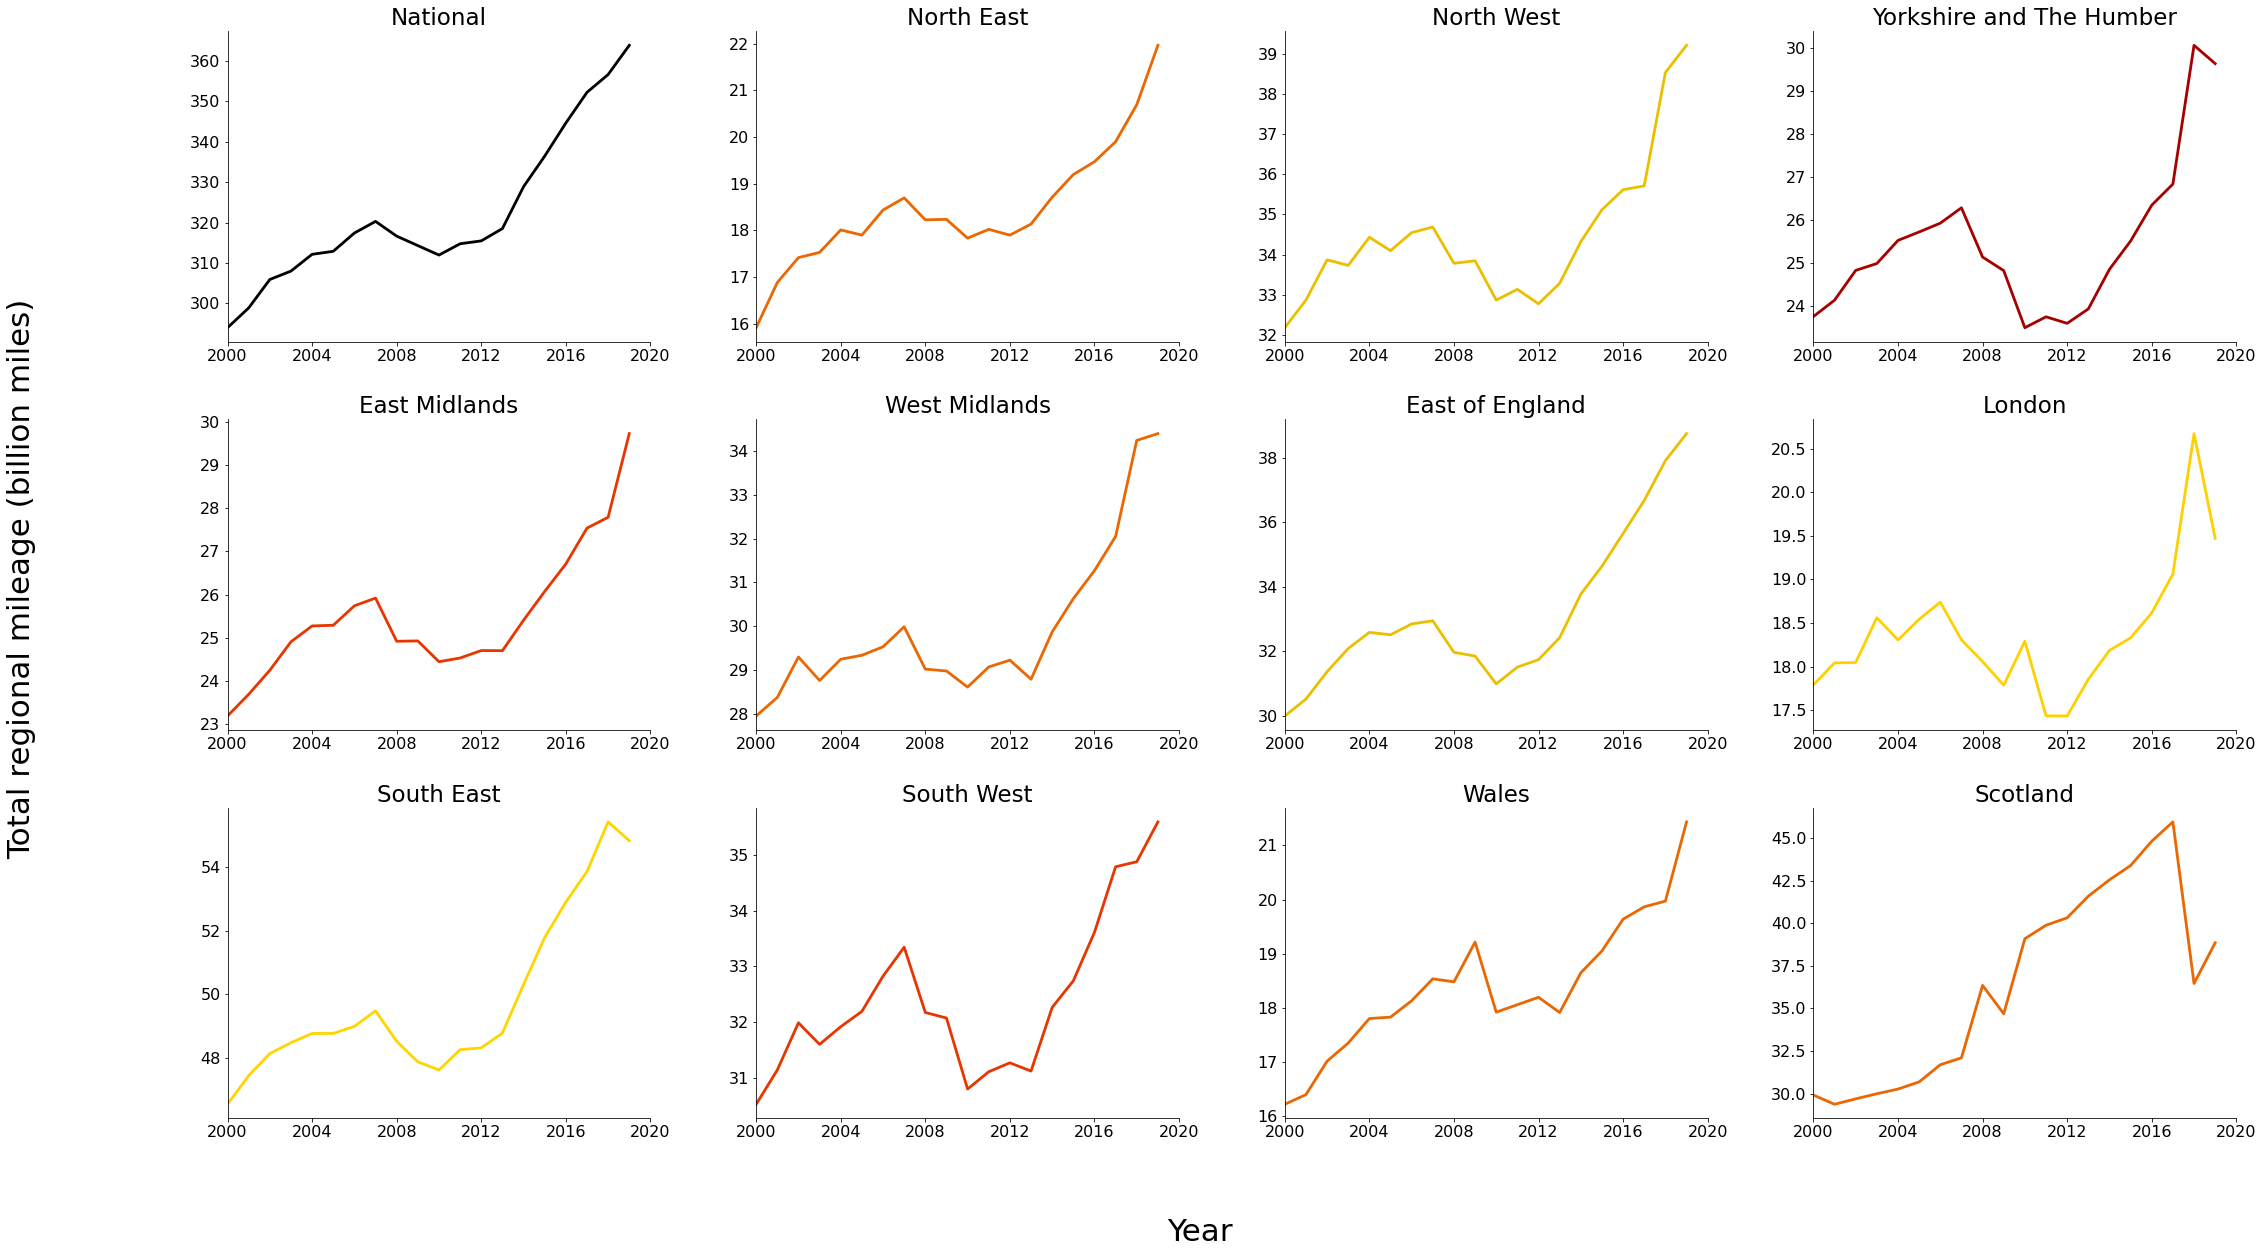

In [15]:
# Cars and taxis...
fig, ax = plt.subplots(3, 4, figsize=(36,20))
fig.subplots_adjust(wspace=0.25, hspace=0.25)
n = 0
region_colours = ['#eb6702','#ebbf00','#a60000','#e83600','#eb6702','#ebbf00','#ffd000', '#ffd500','#e83600','#eb6702','#eb6702']
for i in range(3):
    for j in range(4):
        if n == 0:
            ax[i,j].plot(annual_mileage.index, annual_mileage['all_motor_vehicles'], \
                         color='black', linewidth=2.8)
            ax[i,j].set_title('National', fontsize=23)
        else:
            ax[i,j].plot(annual_mileage.index, annual_mileage_regional.loc[region_names[n-1]]['all_motor_vehicles'], \
                         color=region_colours[n-1], linewidth=2.8)
            ax[i,j].set_title(region_names[n-1], fontsize=23)
        
        ax[i,j].set_xlim(2000, 2020)
        ax[i,j].set_xticks(np.arange(2000, 2021, 4))
        ax[i,j].set_xticklabels(np.arange(2000, 2021, 4), fontsize=16)
        #ax[i,j].yaxis.set_major_locator(plt.MaxNLocator(5))
        ax[i,j].tick_params(axis='y', labelsize=16)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
        n += 1

fig.text(0.5, 0.04, 'Year', ha='center', fontsize=31)
fig.text(0.04, 0.5, 'Total regional mileage (billion miles)', va='center', rotation='vertical', fontsize=31)
plt.savefig('mileage_by_region.png')
plt.show()

### Mileage changes on different road types

In [16]:
annual_mileage_road_type

pedal_cycles  two_wheeled_motor_vehicles  cars_and_taxis  \
road_name year                                                             
A         2000      0.611307                    1.340791      108.634285   
          2001      0.617350                    1.393848      110.740168   
          2002      0.680065                    1.419266      112.646474   
          2003      0.642674                    1.573466      113.236940   
          2004      0.622781                    1.437727      114.366387   
...                      ...                         ...             ...   
U         2015      1.261619                    0.294173       40.239146   
          2016      1.293660                    0.305579       41.377410   
          2017      1.365531                    0.314604       42.625763   
          2018      1.531874                    0.408149       52.664970   
          2019      1.450340                    0.337474       47.220223   

                buses_and_coaches       lgvs  all_hgvs  all_motor_vehicles  
road_name year                                                              
A         2000           1.335079  14.361582  8.477228          134.171427  
          2001           1.344917  14.732082  8.386991          136.627875  
          2002           1.397531  14.924999  8.489871          138.863847  
          2003           1.380736  15.718403  8.508266          140.396572  
          2004           1.293861  16.155087  8.725209          141.962167  
...                           ...        ...       ...                 ...  
U         2015           0.562996   5.249325  0.711365           47.127974  
          2016           0.537062   5.585915  0.674374           48.561079  
          2017           0.548524   5.906719  0.668993           50.127583  
          2018           0.625440   7.359235  0.694096           61.802019  
          2019           0.518084   6.668092  0.584671           55.396856  

[100 rows x 7 columns]

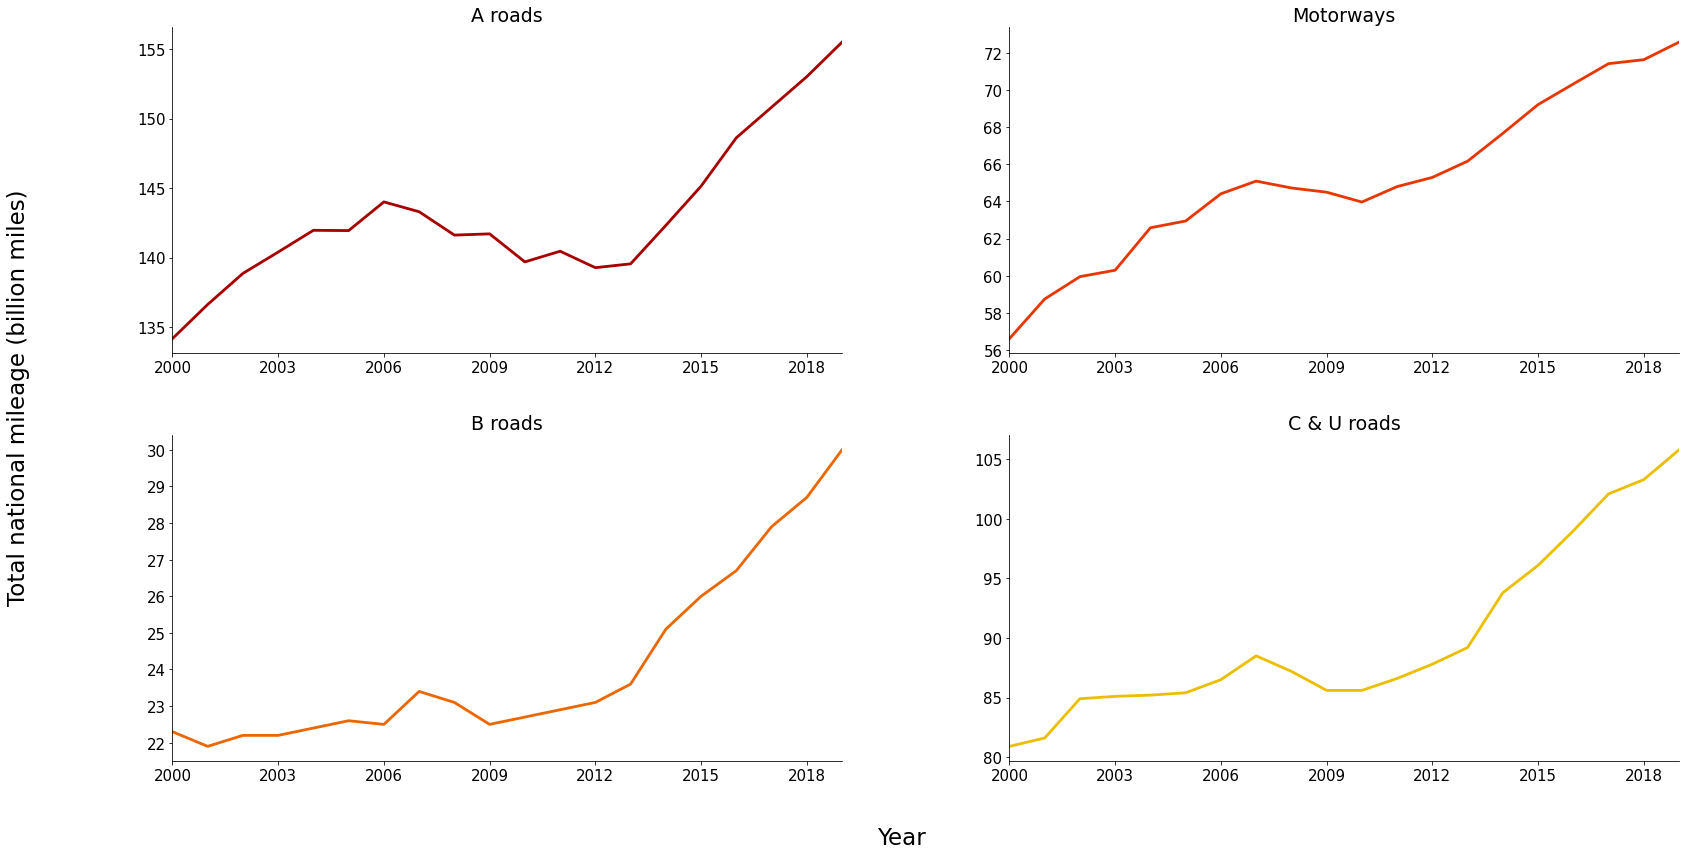

C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jackm\Anacond

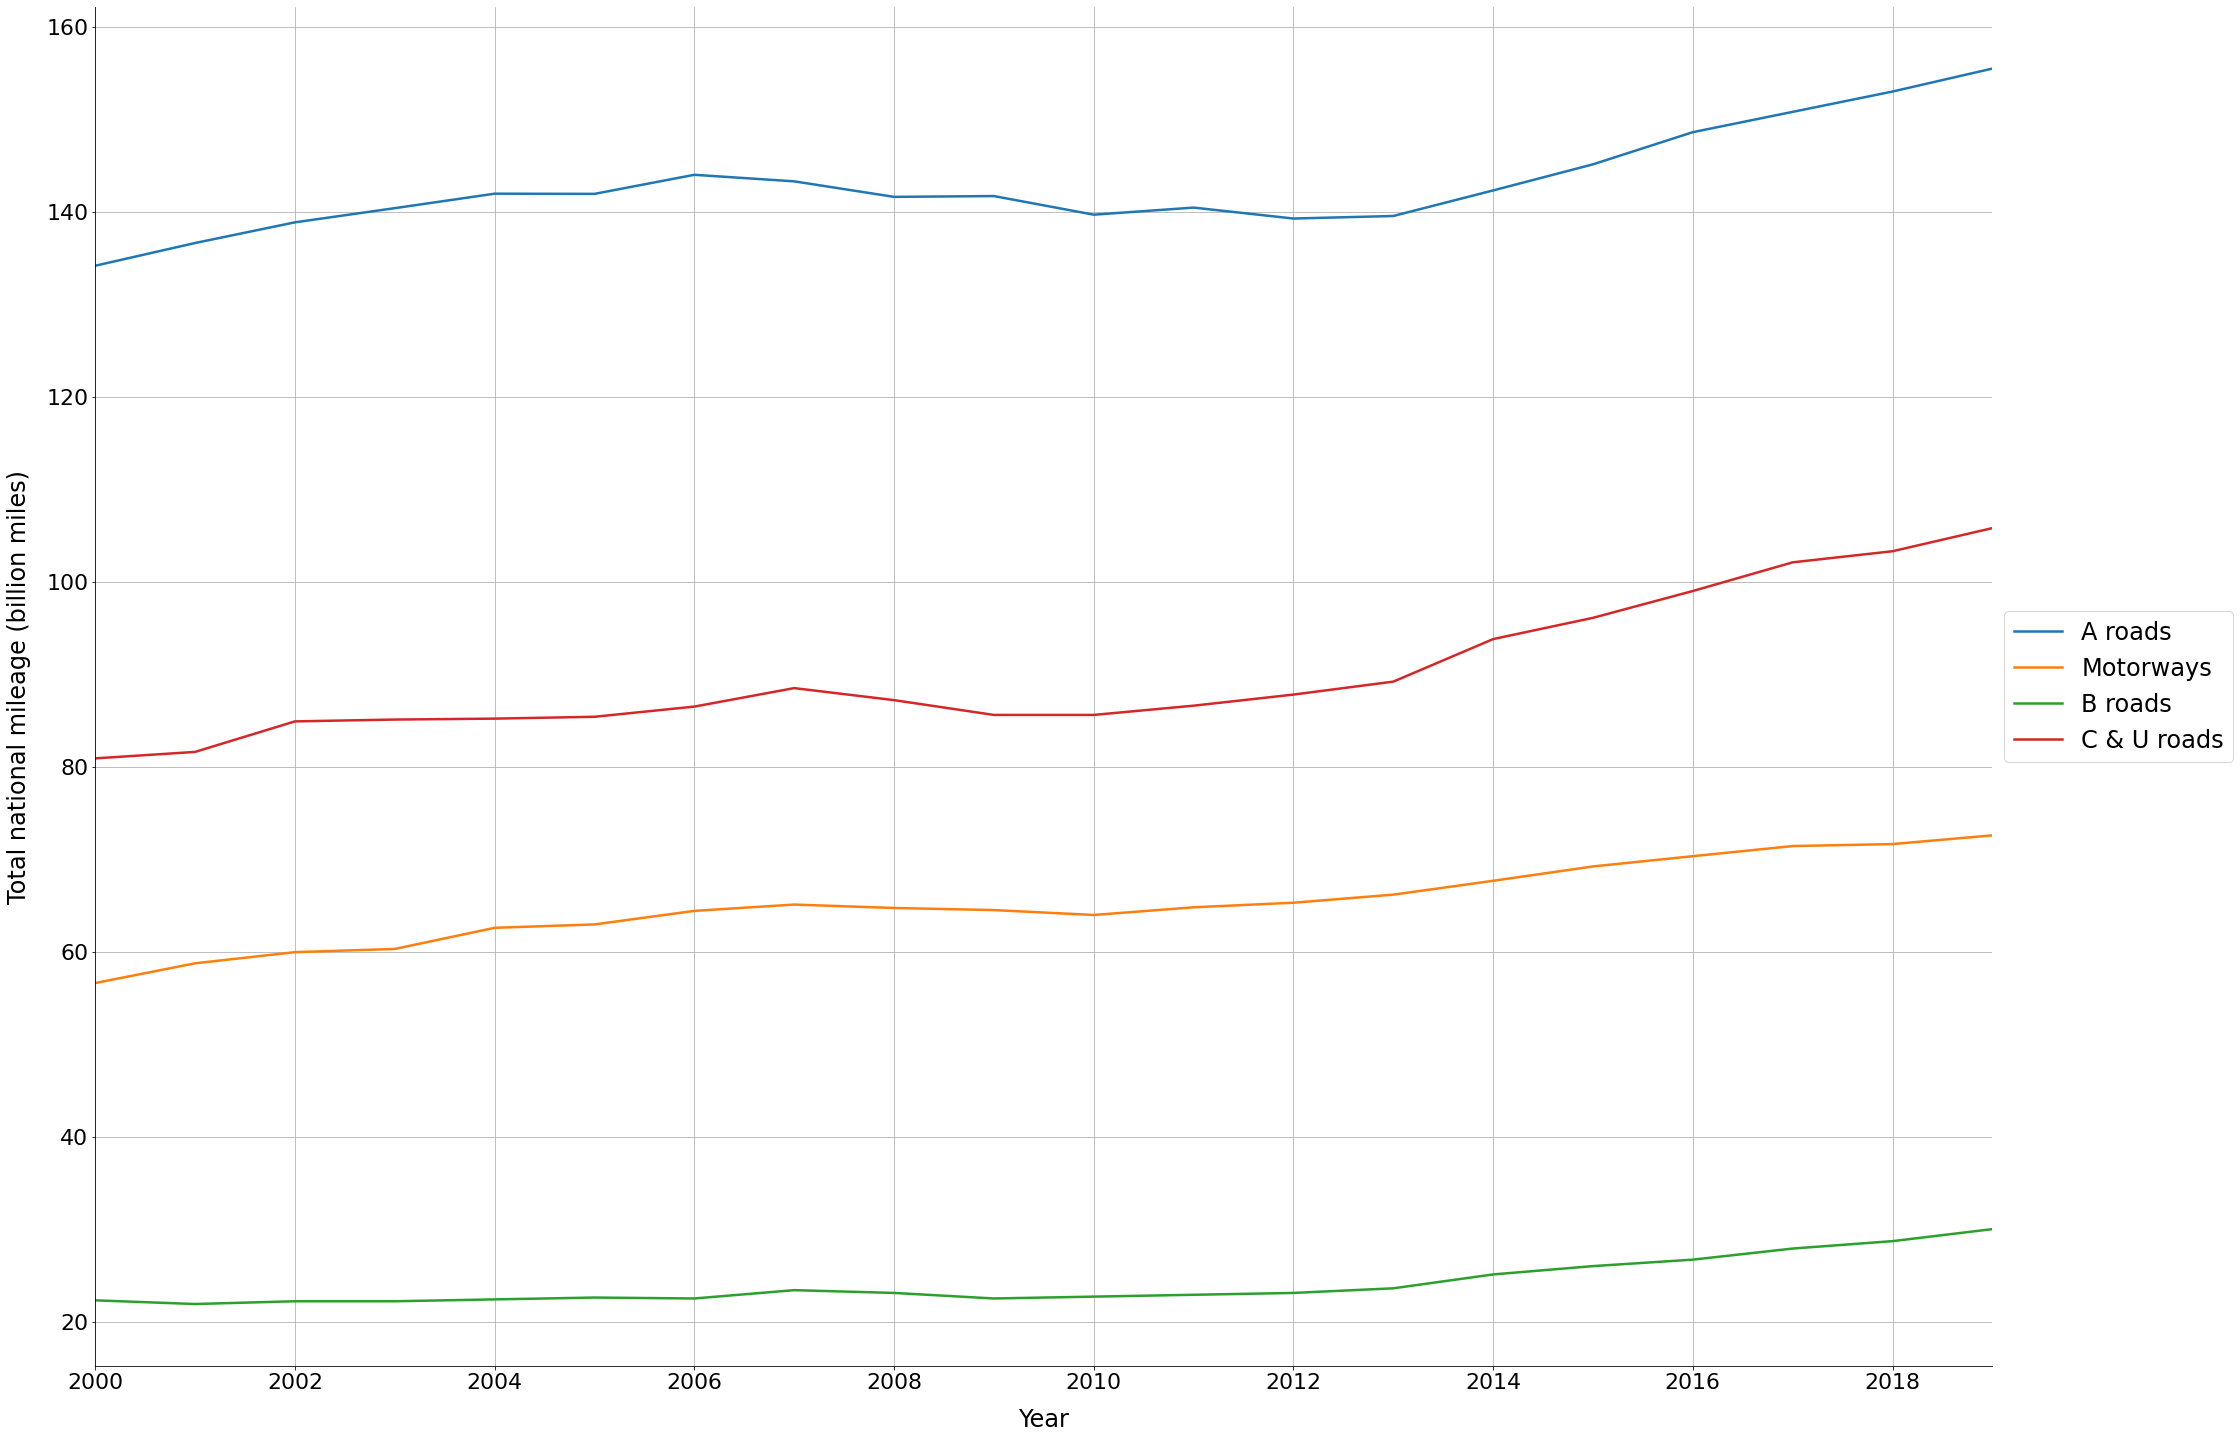

In [17]:
# Plotting road types on separate axes...
fig, ax = plt.subplots(2, 2, figsize=(27,13.5))
fig.subplots_adjust(wspace=0.25, hspace=0.25)
n = 0
roads = ['A','M','B','CU']
road_labels = ['A roads','Motorways','B roads','C & U roads']
road_colours = ['#a60000','#e83600','#eb6702','#ebbf00']
for i in range(2):
    for j in range(2):
        if n < 3:
            ax[i,j].plot(annual_mileage.index, annual_mileage_road_type.loc[roads[n]]['all_motor_vehicles'], \
                         color=road_colours[n], linewidth=2.8)
        else:
            ax[i,j].plot(annual_mileage.index, annual_mileage_CU['all_motor_vehicles'], \
                         color=road_colours[n], linewidth=2.8)
            
        ax[i,j].set_xlim(2000, 2019)
        ax[i,j].set_xticks(np.arange(2000, 2019, 3))
        ax[i,j].set_xticklabels(np.arange(2000, 2019, 3), fontsize=15)
        ax[i,j].tick_params(axis='y', labelsize=15)
        ax[i,j].set_title(road_labels[n], fontsize=19)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
        n += 1

fig.text(0.5, 0.04, 'Year', ha='center', fontsize=23)
fig.text(0.04, 0.5, 'Total national mileage (billion miles)', va='center', rotation='vertical', fontsize=23)
#plt.savefig('mileage_by_road_type_separate.png')
plt.show()

# Plotting all road types on one graph...
fig = plt.figure(figsize=(34,25))
sns.lineplot(annual_mileage_road_type.loc['A'].index, annual_mileage_road_type.loc['A']['all_motor_vehicles'], \
             linewidth=2.5, label='A roads')#, color='green')
sns.lineplot(annual_mileage_road_type.loc['M'].index, annual_mileage_road_type.loc['M']['all_motor_vehicles'], \
             linewidth=2.5, label='Motorways')#, color='blue')
sns.lineplot(annual_mileage_road_type.loc['B'].index, annual_mileage_road_type.loc['B']['all_motor_vehicles'], \
             linewidth=2.5, label='B roads')#, color='red')
sns.lineplot(annual_mileage_CU.index, annual_mileage_CU['all_motor_vehicles'], \
             linewidth=2.5, label='C & U roads')#, color='yellow')
plt.ylabel('Total national mileage (billion miles)', fontsize=24, labelpad=15)
plt.xlabel('Year', fontsize=24, labelpad=15)
plt.xlim(2000, 2019)
plt.xticks(np.arange(2000, 2019, 2), fontsize=22)
plt.yticks(fontsize=22)
plt.grid(which='both')
plt.legend(fontsize=24, loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('mileage_by_road_type_together.png')
plt.show()

There is a big drop in annual mileage from 2008, most likely due to the aftermath of the 2008 financial crisis.

### Mileage changes for different vehicle types

In [18]:
annual_mileage

,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
year,,,,,,,
2000,2.6,2.552265,239.472812,3.2,30.414674,18.285918,293.979657
2001,2.6,2.863607,243.467891,3.2,31.152079,18.116159,298.870948
2002,2.7,2.720927,249.910752,3.2,31.674613,18.438289,305.911906
2003,2.8,2.858684,251.301169,3.3,32.314335,18.267851,307.991332
2004,2.6,2.587761,253.713285,3.2,33.902618,18.778482,312.142388
2005,2.7,2.649214,253.695926,3.2,34.770494,18.594631,312.886736
2006,2.8,2.576826,256.314357,3.3,36.492285,18.707230,317.414707
2007,2.6,2.773571,257.084689,3.4,38.219667,18.858950,320.291751
2008,2.8,2.667515,254.487314,3.1,37.792381,18.510315,316.642400


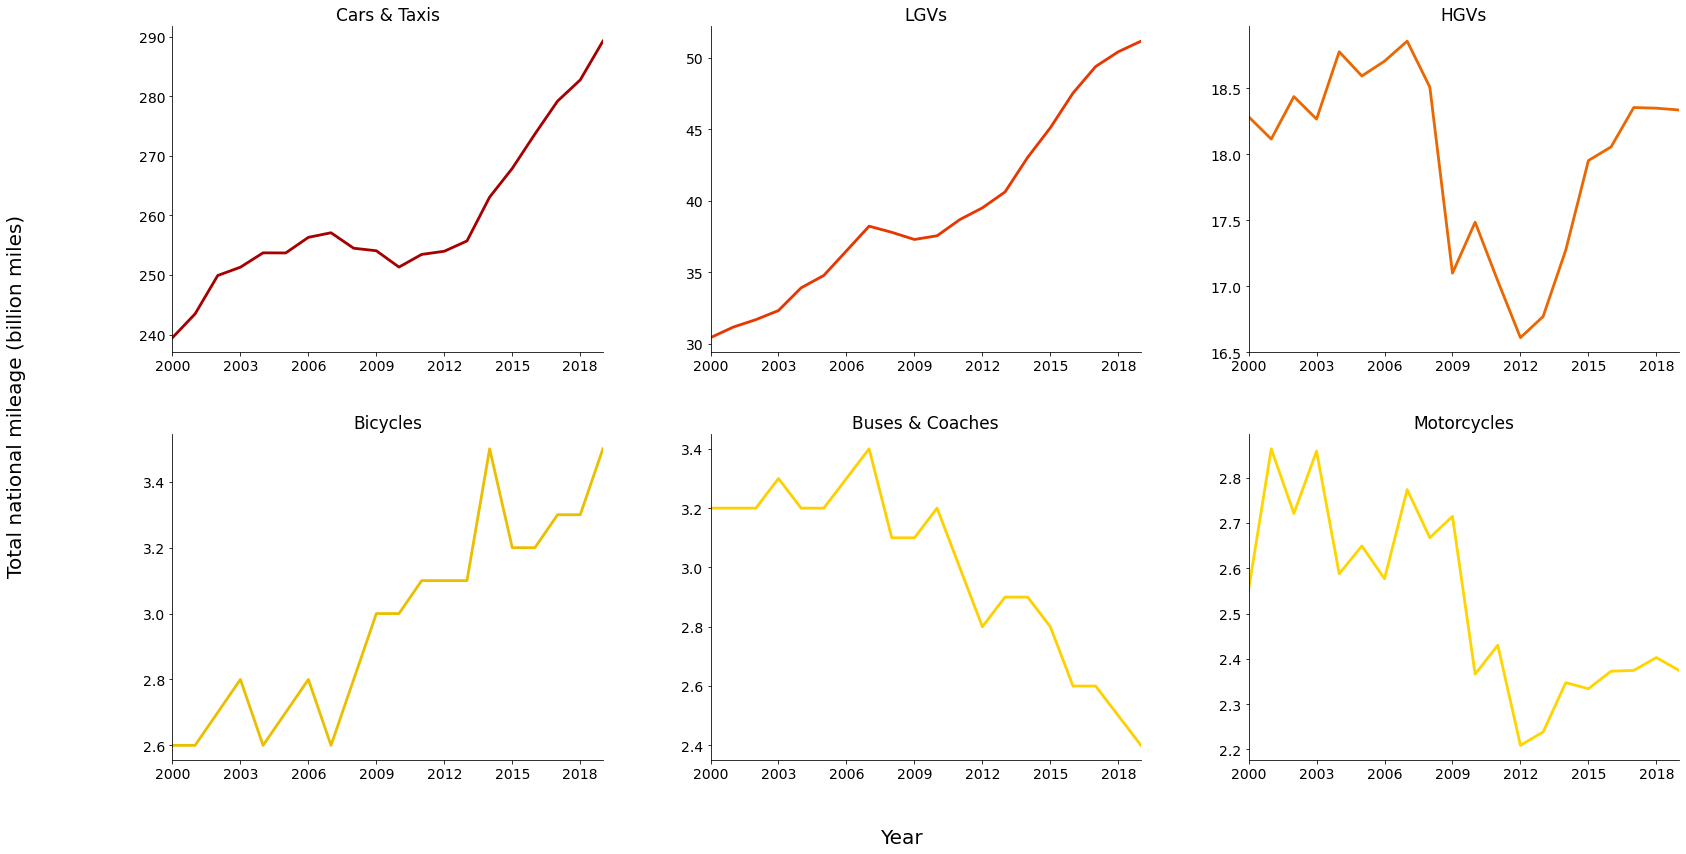

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(27,13.5))
fig.subplots_adjust(wspace=0.25, hspace=0.25)
n = 0
vehicles = ['cars_and_taxis','lgvs','all_hgvs','pedal_cycles','buses_and_coaches','two_wheeled_motor_vehicles']
vehicle_labels = ['Cars & Taxis','LGVs','HGVs','Bicycles','Buses & Coaches','Motorcycles']
vehicle_colours = ['#a60000','#e83600','#eb6702','#ebbf00','#ffd000', '#ffd500']
for i in range(2):
    for j in range(3):
        ax[i,j].plot(annual_mileage.index, annual_mileage[vehicles[n]], color=vehicle_colours[n], linewidth=2.8)
        ax[i,j].set_xlim(2000, 2019)
        ax[i,j].set_xticks(np.arange(2000, 2019, 3))
        ax[i,j].set_xticklabels(np.arange(2000, 2019, 3), fontsize=14)
        ax[i,j].tick_params(axis='y', labelsize=14)
        ax[i,j].set_title(vehicle_labels[n], fontsize=17)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
        n += 1

fig.text(0.5, 0.04, 'Year', ha='center', fontsize=20)
fig.text(0.04, 0.5, 'Total national mileage (billion miles)', va='center', rotation='vertical', fontsize=20)
#plt.savefig('mileage_by_vehicle.png')
plt.show()

# Task 2

## Time Series Forcasting with SARIMA

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\jackm\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\jackm\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12,

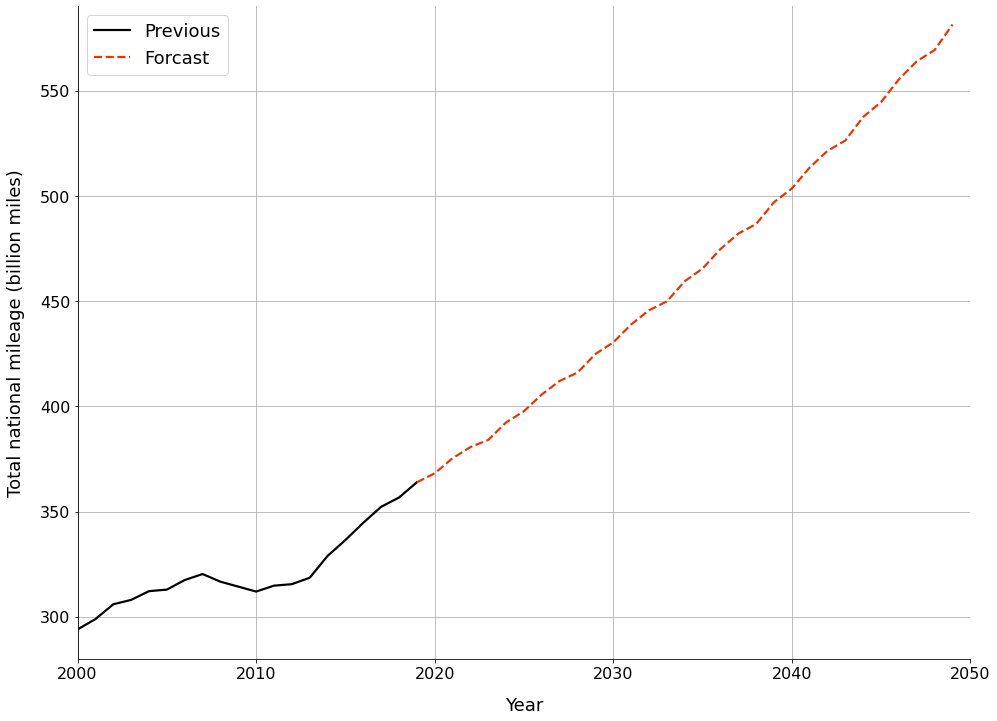

In [21]:
X = annual_mileage['all_motor_vehicles'].values
history = np.log(np.array(X))
x_labels = np.arange(2000, 2050)

# define model configuration
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 5)

# 30-year predictions...
sarimax_model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order)
res = sarimax_model.fit()
predictions = res.forecast(steps=30)
predictions = list(np.exp(np.array(predictions)))

# Plotting the SARIMA forecast...
fig = plt.figure(figsize=(16,12))
sns.lineplot(x_labels[:20], X, linewidth=2.2, label='Previous', color='black')
sns.lineplot(x_labels[19:], [X[-1]]+predictions, linestyle='--', linewidth=2.2, label='Forcast', color='#e83600')
plt.ylabel('Total national mileage (billion miles)', fontsize=18, labelpad=15)
plt.xlabel('Year', fontsize=18, labelpad=15)
plt.xlim(2000, 2050)
plt.ylim(280, 590)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.grid(which='both')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('mileage_basic_prediction.png')
plt.show()

# Task 3

Here I import the governement data on licenced electric vehicle numbers since 2010. Using data from here:   
https://www.gov.uk/government/statistical-data-sets/all-vehicles-veh01

In [22]:
# Extracting electric vehicle numbers since 2010...

ev_doc = xlrd.open_workbook("ULEV by fuel type.xlsx")
ev_counts = []
ev_power_types = []
ev_vehicle_types = []
count_dates = []
vehicle_types = ['Cars', 'Cars', 'Cars', 'Cars','LGVs', 'HGVs', 'Motorcycles', \
                 'Buses & coaches', 'Cars'] * 43
ev_types = ['Electric', 'Plug-in Hybrid', 'Range-extended electric', 'Hybrid', 'Electric', \
            'Electric', 'Electric','Electric', 'Range-extended electric'] * 43
excel_col_locs = [1,2,3,4,8,12,13,14,16]
row = 7

# Reading excel sheet...
sheet = ev_doc.sheet_by_index(0)
EVs = []
# Extracting regional road length totals...
for i, row in enumerate(range(8, 51)):
    #EVs = []
    for col in excel_col_locs:
        ev_count = sheet.cell_value(rowx=row, colx=col)
        #EVs.append(ev_count)
        ev_counts.append(ev_count)
        count_dates.append(sheet.cell_value(rowx=row, colx=0))

count_dates = np.array(count_dates).reshape(-1, 1)
ev_counts = np.array(ev_counts).reshape(-1, 1)
vehicle_types = np.array(vehicle_types).reshape(-1, 1)
ev_types = np.array(ev_types).reshape(-1, 1)
ev_data = np.hstack(np.array([count_dates, ev_counts, vehicle_types, ev_types], dtype=object))

In [23]:
EV_counts = pd.DataFrame(data=ev_data, columns=['quarter', 'vehicle count', 'vehicle type', 'power type'])
EV_counts['quarter'] = EV_counts['quarter'].str.replace(r'(\d+) (Q\d)', r'\1-\2')
EV_counts['date'] = pd.PeriodIndex(EV_counts['quarter'], freq='Q').to_timestamp()
EV_counts.drop('quarter', axis=1, inplace=True)
total_ev_counts = EV_counts[['date', 'vehicle count']].groupby('date').sum()
total_annual_ev_counts = total_ev_counts.resample('Y').sum()
total_ev_counts.head(10)

,vehicle count
date,
2010-01-01,7769.0
2010-04-01,7869.0
2010-07-01,7666.0
2010-10-01,7728.0
2011-01-01,8145.0
2011-04-01,8485.0
2011-07-01,8567.0
2011-10-01,8652.0
2012-01-01,8948.0


C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


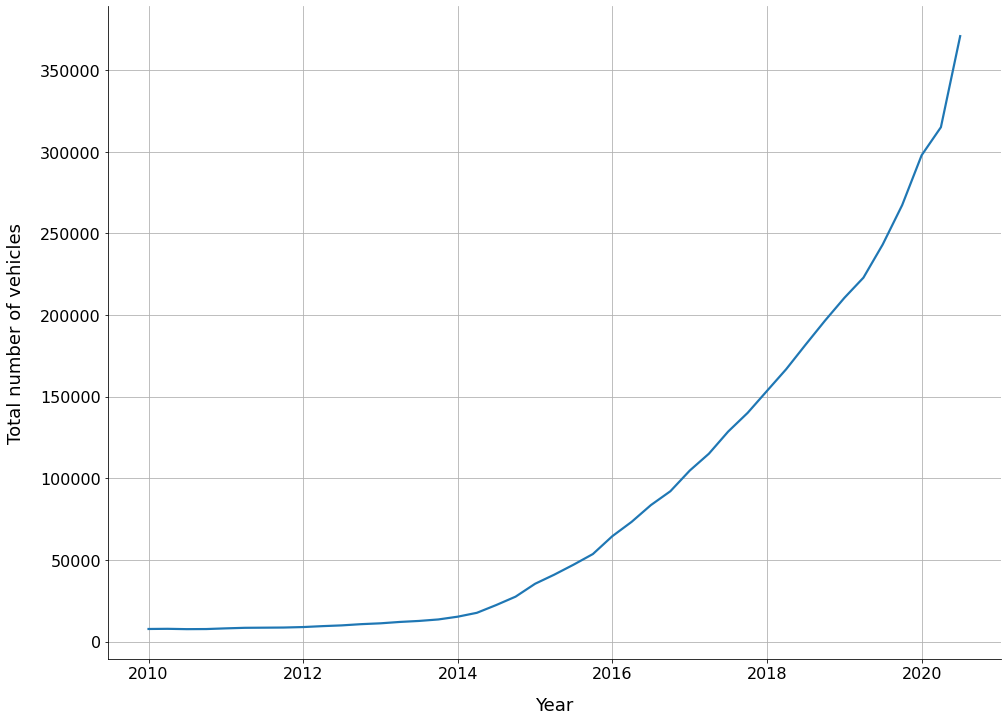

In [236]:
fig = plt.figure(figsize=(16,12))
sns.lineplot(total_ev_counts.index, total_ev_counts['vehicle count'], linewidth=2.2)
plt.ylabel('Total number of vehicles', fontsize=18, labelpad=15)
plt.xlabel('Year', fontsize=18, labelpad=15)
#plt.xlim(2010,2021)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=18)
plt.grid(which='both')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('ev_numbers_history.png')
plt.show()

#### Governement EV vehicle plans:   
- 50-70% of new vehicles to be fully electric by 2030, the rest being hybrid (100% of new vehicles to be either electric or hybrid by 2030)
- 100% of new vehicles to be fully electric by 2035 (idealy by 2030)    
#### Other relevent info:       
- For total vehicles, need to minus the number of new vehicles 12 years ago each year

C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


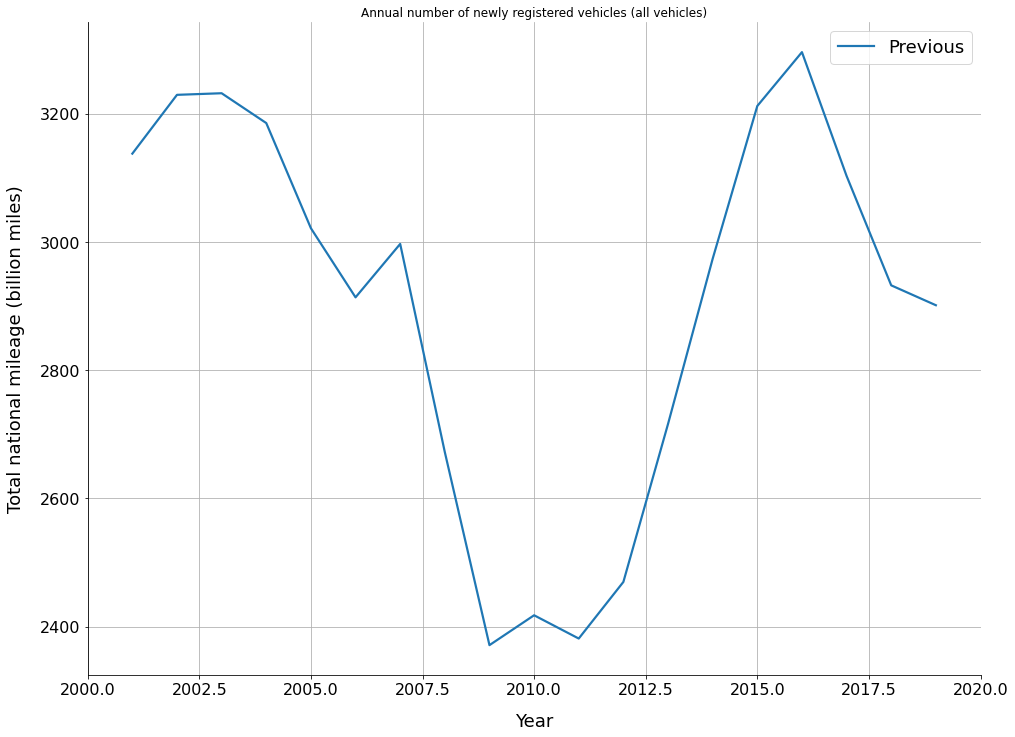

In [25]:
new_vehicles = [3137.7,3229.4,3231.9,3185.4,3021.4,2913.6,2996.9,2672.2,2371.2,2417.8,2381.5,2469.8, \
 2716.1,2973.7,3212.0,3296.0,3102.9,2932.3,2901.3]

# Plotting the ARIMA forecast...
fig = plt.figure(figsize=(16,12))
sns.lineplot(x_labels[1:20], new_vehicles, linewidth=2.2, label='Previous')
plt.ylabel('Total national mileage (billion miles)', fontsize=18, labelpad=15)
plt.xlabel('Year', fontsize=18, labelpad=15)
plt.xlim(2000,2020)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Annual number of newly registered vehicles (all vehicles)')
plt.legend(fontsize=18)
plt.grid(which='both')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [26]:
veh_doc = xlrd.open_workbook("veh0101.xlsx")
veh_counts = []
count_dates = []
col = 8

# Reading excel sheet...
sheet = veh_doc.sheet_by_index(0)
for i, row in enumerate(range(31, 111)):
    veh_count = sheet.cell_value(rowx=row, colx=8)
    veh_counts.append(veh_count)
    count_dates.append(sheet.cell_value(rowx=row, colx=0))

v_counts = [veh_counts[i+3] for i in np.arange(0, int(len(veh_counts)), 4)]

new_ev_counts = []
new_veh_doc = xlrd.open_workbook("veh0150.xlsx")
sheet = new_veh_doc.sheet_by_index(0)
# Reading excel sheet...
for row in range(19, 29):
    new_ev_count = sheet.cell_value(rowx=row, colx=9)
    new_ev_counts.append(new_ev_count)

C:\Users\jackm\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\jackm\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12,

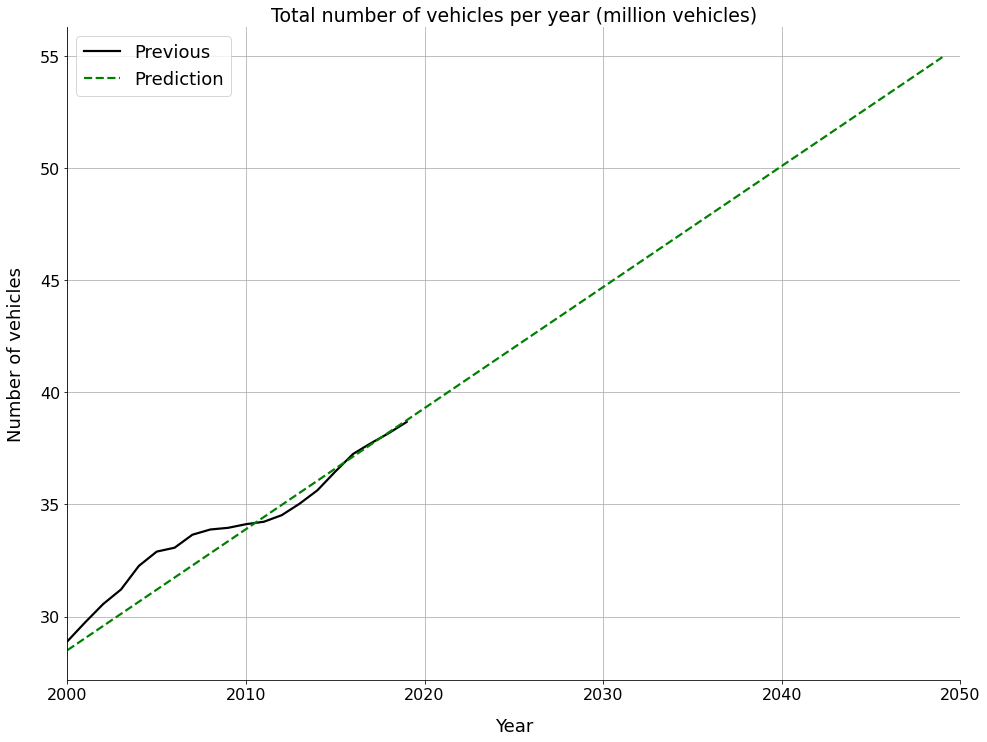

56.146147589127565


In [290]:
million_v_counts = np.array(v_counts) / 1000
history = np.log(million_v_counts)

# define model configuration
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 7)

# 30-year predictions...
sarimax_model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order)
res = sarimax_model.fit()
predictions = res.forecast(steps=30)
predictions = list(np.exp(np.array(predictions)))

def line_func(x, m, c):
    return m*x + c

# Plotting the ARIMA forecast...
fig = plt.figure(figsize=(16,12))
sns.lineplot(x_labels[:20], million_v_counts, linewidth=2.2, label='Previous', color='black')
#sns.lineplot(x_labels[19:], [million_v_counts[-1]]+predictions, linestyle='--', linewidth=2.2, label='Forcast', color='#e83600')
sns.lineplot(x_labels, line_func(x_labels, 0.54, -1051.5), linestyle='--', linewidth=2.2, color='green', label='Prediction')
plt.ylabel('Number of vehicles', fontsize=18, labelpad=15)
plt.xlabel('Year', fontsize=18, labelpad=15)
plt.title('Total number of vehicles per year (million vehicles)', fontsize=19)
plt.xlim(2000, 2050)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.grid(which='both')
sns.despine(top=True, right=True, left=False, bottom=False)
#plt.savefig('num_vehicles_prediction.png', bbox_inches='tight')
plt.show()

print(predictions[-1])

In [31]:
print('Rate of increase in vehicles (million per year):')
print((predictions[20] - predictions[15]) / 5)

Rate of increase in vehicles (million per year):
0.5735210343546399


In [32]:
total_annual_ev_counts

,vehicle count
date,
2010-12-31,31032.0
2011-12-31,33849.0
2012-12-31,39139.0
2013-12-31,49601.0
2014-12-31,82968.0
2015-12-31,177219.0
2016-12-31,313747.0
2017-12-31,488719.0
2018-12-31,698777.0


In [185]:
ev_percentages = (1/1e6) * total_annual_ev_counts.values.reshape(-1)[:-1] / million_v_counts[10:]

## Fitting a sigmoid curve for the number of EV projection

C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


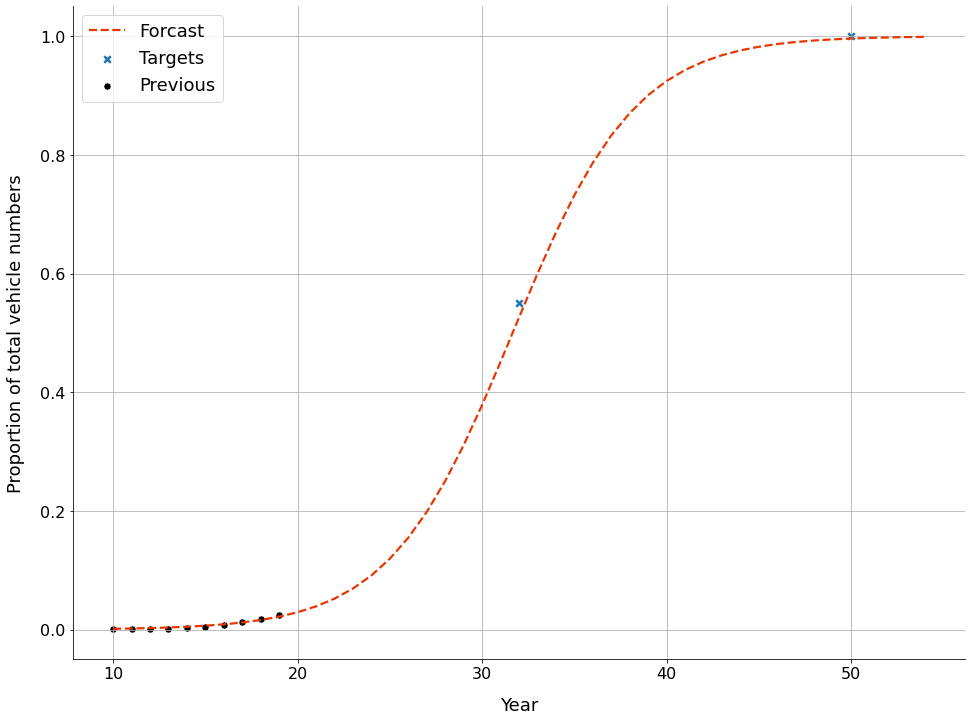

In [247]:
fit_x = np.arange(10, 20, dtype=np.float64)
fit_y = np.array(million_ev_counts, dtype=np.float64)

def fit_function(x, b, c, f, g):
    x *= b
    return g*(1 / (1 + (f*np.exp(-(x-c)))))

#params, pcov = sp.optimize.curve_fit(f=fit_function, xdata=fit_x, ydata=fit_y, p0=[0.26, 14, 0.005, 1.01])
#b, c, f, g = params[0], params[1], params[2], params[3]

fig = plt.figure(figsize=(16,12))
#sns.lineplot(fit_x, fit_function(fit_x, b, c, f, g), linestyle='--', linewidth=2.2, label='Forcast', color='#e83600')
sns.lineplot(np.arange(10,55), fit_function(np.arange(10,55, dtype=np.float64), 0.3, 14.9, 0.0045, 1), linestyle='--', linewidth=2.2, label='Forcast', color='#e83600')
sns.scatterplot([32,50], [0.55,1], marker='X', s=90, label='Targets')
sns.scatterplot(np.arange(10,20), ev_percentages, color='black', s=50, label='Previous')
plt.ylabel('Proportion of total vehicle numbers', fontsize=18, labelpad=15)
plt.xlabel('Year', fontsize=18, labelpad=15)
#plt.xlim(10,20)
#plt.ylim(0,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.grid(which='both')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('ev_proportion_prediction.png')
plt.show()

C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jackm\Anacond

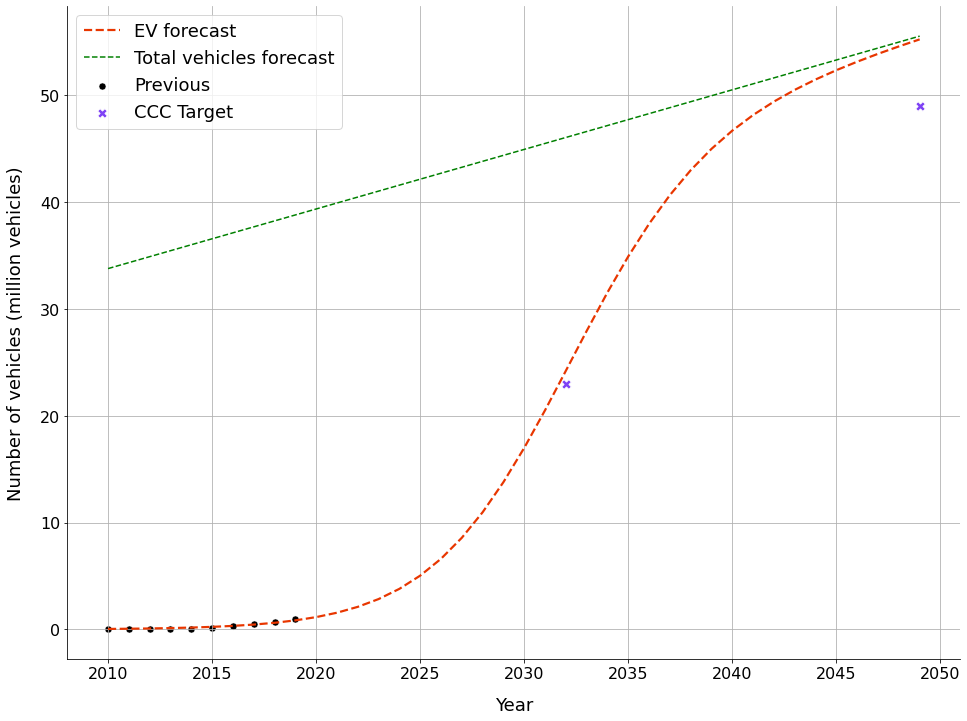

In [293]:
fit_x = np.array(list(np.arange(10, 20)) + [32,49])
fit_y = np.array(list(million_ev_counts) + [23,49])

def fit_function(x, b, c, f, g, m, h):
    return g*((m*x) + h) * (1 / (1 + (f*np.exp(-((b*x)-c)))))  # + (a*x/10)

# Plotting the forecast...
fig = plt.figure(figsize=(16,12))   # 0.57, 0.17, 9.5, 0, 0.04, 7
#sns.lineplot(np.arange(10,20), million_ev_counts, linewidth=2.2, label='Previous')
sns.lineplot(np.arange(10,50), fit_function(np.arange(10,50, dtype=np.float64), 0.3, 14.9, 0.0045, 1, 0.558, 28.204), \
             linestyle='--', linewidth=2.2, label='EV forecast', color='#e83600')
sns.scatterplot(fit_x[:-2], fit_y[:-2], color='black', s=50, label='Previous')
sns.scatterplot(fit_x[-2:], fit_y[-2:], marker='X', s=90, color='#7e42f5', label='CCC Target')
sns.lineplot(np.arange(10,50), line_func(np.arange(10,50), 0.558, 28.204), linestyle='--', color='green', \
             label='Total vehicles forecast')
plt.ylabel('Number of vehicles (million vehicles)', fontsize=18, labelpad=15)
plt.xlabel('Year', fontsize=18, labelpad=15)
plt.xticks(ticks=np.arange(10,55,5), labels=np.arange(2010,2055, 5), fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.grid(which='both')
sns.despine(top=True, right=True, left=False, bottom=False)
#plt.savefig('ev_nums_prediction.png', bbox_inches='tight')
plt.show()

- Distribution of vehicle types    
Find mileage to number ratio (9.5 Bmiles per million vehicles per year)
- Find distribution of EV ranges and battery power over vehicle types
- Get energy required (per year) (assuming 0.3kWh/mile)
- Find external estimate for power
- Find energy sources (wind, hydroelectric, assume 10 min charging time (large bursts) during day and steady charge during evening (more vehicles charging at night))

C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


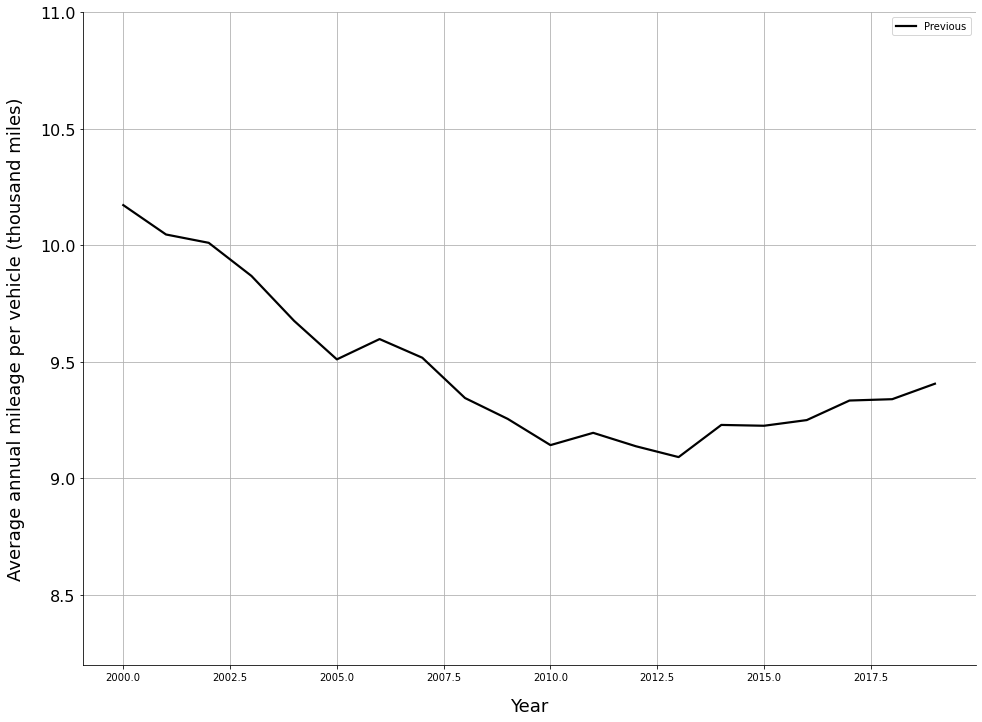

In [315]:
mileage_to_num_ratios = annual_mileage['all_motor_vehicles'].values / million_v_counts
'''
X = mileage_to_num_ratios
history = np.log(np.array(X))
x_labels = np.arange(2000, 2050)

# define model configuration
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 2, 8)

# 30-year predictions...
sarimax_model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order)
res = sarimax_model.fit()
predictions = res.forecast(steps=30)
predictions = list(np.exp(np.array(predictions)))
'''
# Plotting the ARIMA forecast...
fig = plt.figure(figsize=(16,12))
#sns.lineplot(x_labels[19:], [X[-1]]+predictions, linestyle='--', linewidth=2.2, label='Forcast', color='#e83600')
sns.lineplot(x_labels[:20], mileage_to_num_ratios, linewidth=2.2, label='Previous', color='black')
plt.ylabel('Average annual mileage per vehicle (thousand miles)', fontsize=18, labelpad=15)
plt.xlabel('Year', fontsize=18, labelpad=15)
#plt.xlim(2000,2020)
plt.ylim(8.2,11)
#plt.xticks(ticks=np.arange(2000,2024,4), labels=np.arange(2000,2024,4), fontsize=16)
plt.yticks(fontsize=16)
plt.grid(which='both')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('mileage_num_ratio.png')
plt.show()

C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


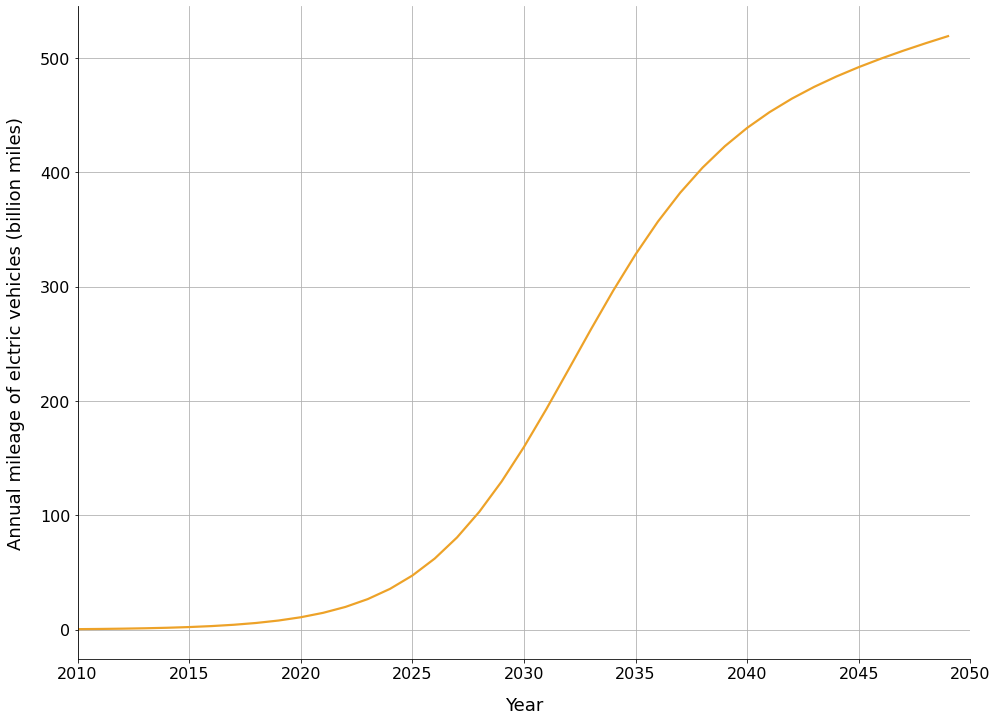

In [331]:
fit_x = np.array(list(np.arange(10, 20)) + [32,49])
fit_y = np.array(list(million_ev_counts) + [23,49])

def fit_function(x, b, c, f, g, m, h):
    return g*((m*x) + h) * (1 / (1 + (f*np.exp(-((b*x)-c)))))  # + (a*x/10)

# Plotting the forecast...
fig = plt.figure(figsize=(16,12))   # 0.57, 0.17, 9.5, 0, 0.04, 7
sns.lineplot(np.arange(10,50), 9.4*fit_function(np.arange(10,50, dtype=np.float64), 0.3, 14.9, 0.0045, 1, 0.558, 28.204), \
             linestyle='-', linewidth=2.2, color='#eda228')
plt.ylabel('Annual mileage of elctric vehicles (billion miles)', fontsize=18, labelpad=15)
plt.xlabel('Year', fontsize=18, labelpad=15)
plt.xticks(ticks=np.arange(10,55,5), labels=np.arange(2010,2055, 5), fontsize=16)
plt.xlim(10,50)
plt.yticks(fontsize=16)
plt.grid(which='both')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('ev_mileage_prediction.png', bbox_inches='tight')
plt.show()

C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


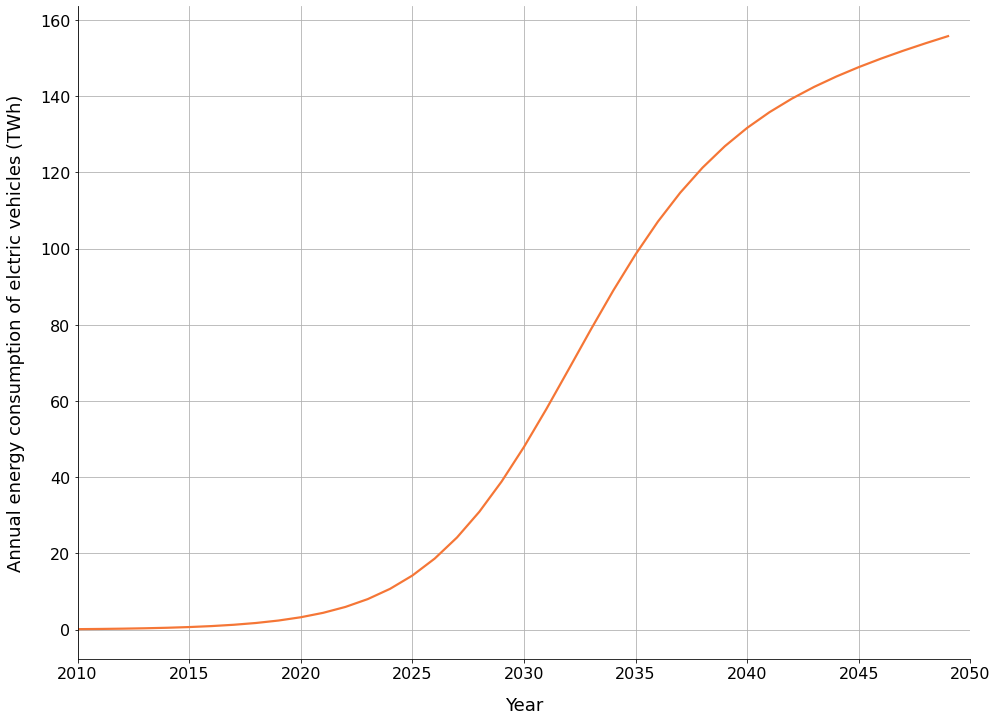

In [327]:
fit_x = np.array(list(np.arange(10, 20)) + [32,49])
fit_y = np.array(list(million_ev_counts) + [23,49])

def fit_function(x, b, c, f, g, m, h):
    return g*((m*x) + h) * (1 / (1 + (f*np.exp(-((b*x)-c)))))  # + (a*x/10)

# Plotting the forecast...
fig = plt.figure(figsize=(16,12))   # 0.57, 0.17, 9.5, 0, 0.04, 7
sns.lineplot(np.arange(10,50), 9.4*0.3*fit_function(np.arange(10,50, dtype=np.float64), 0.3, 14.9, 0.0045, 1, 0.558, 28.204), \
             linestyle='-', linewidth=2.2, color='#f57636')
plt.ylabel('Annual energy consumption of elctric vehicles (TWh)', fontsize=18, labelpad=15)
plt.xlabel('Year', fontsize=18, labelpad=15)
plt.xticks(ticks=np.arange(10,55,5), labels=np.arange(2010,2055, 5), fontsize=16)
plt.xlim(10,50)
plt.yticks(fontsize=16)
plt.grid(which='both')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('ev_energy_prediction.png', bbox_inches='tight')
plt.show()

This is an estimate for the energy usage in 2050. 80% of this is for cars. This is slightly more than the National Grid's 'Consumer Transformation' estimate, which assumes that the full non-electric vehicle ban is implimented in 2035 (as I do). This is because the National Grid assumes that the total number of vehicles will remain at current levels, however, this appears contrary to the previous 30 years steady increase in vehicle numbers, which I assume will continue. Due to this, the National Grid predicts about 28 million electric cars in 2050, however I predict about 44 million.

Overall energy consumption of all vehicles will actually decrease from the current levels of 400TWh, however currently all of that energy is derived from the combustion of petrol and deseal in traditional combustion engines. This will mean that not only the demand for fosssil fuels will greatly decrease, but electricity demand will grow from essentially 0 to about 150TWh in 2050. 

The UK government has announced that it will be "providing £500 million over the next five years to support the rollout of a fast-charging network for electric vehicles, ensuring that drivers will never be further than 30 miles from a rapid charging station.

National grid estimate assumes the total number of vehicles remains at current levels, but in reality the number of vehicels has been steadily increasing over the past 30 years. I assume this increase continues.

https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/904805/DUKES_2020_Chapter_5.pdf

https://www.theccc.org.uk/wp-content/uploads/2020/06/Reducing-UK-emissions-Progress-Report-to-Parliament-Committee-on-Cli.._-002-1.pdf